# Creative car design

In this Jupyter Notebook the results of the external evaluation performed for the creative car design system is performed.

<hr>

## Table of contents
- Student info
- Required libraries
- Loading in the results
- Removing non complete entrees

<hr>

## Student info
- **Name**: Bontinck Lennert
- **StudentID**: 568702
- **Affiliation**: VUB - Master Computer Science: AI

<hr>

## Required libraries

The following code block loads in the required libraries. Anaconda environments should have them installed by default.

In [1]:
# Numerical manipulations libraries
import pandas as pd
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt

<hr>

## Loading in the results

The following code block loads in the final results as they were retreived from the export page of the external evaluation tool.

In [2]:
bias = pd.read_csv(r'Data\bias.csv')
images = pd.read_csv(r'Data\images.csv')
participants = pd.read_csv(r'Data\participants.csv')
ratings_grouped = pd.read_csv(r'Data\ratings_grouped.csv')
ratings_single = pd.read_csv(r'Data\ratings_single.csv')

The following code blocks will validate the loaded in data is correct.

In [3]:
print("-------- bias dataset --------")
display(bias.head())
print("-------- images dataset --------")
display(images.head())
print("-------- participants dataset --------")
display(participants.head())
print("-------- ratings_grouped dataset --------")
display(ratings_grouped.head())
print("-------- ratings_single dataset --------")
display(ratings_single.head())

-------- bias dataset --------


,participant_id,biased,note
0,1,nonbiased,Got me
1,2,nonbiased,"I think I wasnt biased, but wouldnt know really"
2,3,nonbiased,NaN
3,5,nonbiased,NaN
4,6,nonbiased,NaN


-------- images dataset --------


,image_id,filename,path,grouped
0,1,grouped_1,images/grouped/grouped_1.png,1
1,2,grouped_2,images/grouped/grouped_2.png,1
2,3,grouped_3,images/grouped/grouped_3.png,1
3,4,grouped_4,images/grouped/grouped_4.png,1
4,5,single1,images/single/single1.png,0


-------- participants dataset --------


,participant_id,gender,age,expertise,colorblind,bad_vision
0,1,male,20,0,0,0
1,2,male,20,1,0,0
2,3,male,30,0,1,0
3,4,male,20,0,0,0
4,5,male,20,1,0,0


-------- ratings_grouped dataset --------


,participant_id,image_id,correspondence,realism,creative,made_by,note
0,1,1,5,4,3,known,Just turns red but cool it is the car only
1,1,2,5,4,4,computer,Nose changes i think
2,1,3,5,4,4,known,Nice change of wheels
3,1,4,2,3,2,human,Looks like completely different cars to me wou...
4,2,1,5,5,1,human,Its just a car that turns red...


-------- ratings_single dataset --------


,participant_id,image_id,carlike,detail,realism,resemblence,creative,general_impression,made_by,note
0,1,5,1,1,1,1,3,1,computer,Unique but not a car
1,1,6,5,4,3,3,4,2,known,Hmmm not sure if that is two fronts haha
2,1,7,5,5,5,5,4,4,human,NaN
3,1,8,5,4,4,5,3,4,computer,NaN
4,1,9,5,5,4,4,3,3,known,"cool text, meh car"


<hr>

## Removing non complete entrees

The following code blocks remove entrees of participants that didn't complete the survey completely.

In [4]:
# Determine amount of participants that registered
# and show some other statistics
participants_started = participants.shape[0]
singles_ratings_started = ratings_single.shape[0]
grouped_ratings_started = ratings_grouped.shape[0]
biased_ratings_started = bias.shape[0]

print(f"There are {participants_started} participants that started the survey.")
print(f"There are a total of {singles_ratings_started} singles_ratings_started entrees for the original dataset.")
print(f"There are a total of {grouped_ratings_started} grouped_ratings_started entrees for the original dataset.")
print(f"There are a total of {biased_ratings_started} biased_ratings_started entrees for the original dataset.")

There are 32 participants that started the survey.
There are a total of 183 singles_ratings_started entrees for the original dataset.
There are a total of 93 grouped_ratings_started entrees for the original dataset.
There are a total of 23 biased_ratings_started entrees for the original dataset.


In [5]:
# Get a list of participant_ids that rated all grouped images
participants_rated_all_grouped = ratings_grouped.groupby('participant_id')['participant_id'].filter(lambda x: len(x) == 4)

# Get a list of participant_ids that rated all single images
participants_rated_all_single = ratings_single.groupby('participant_id')['participant_id'].filter(lambda x: len(x) == 8)

# Get a list of participant_ids that submitted bias
participants_gave_bias = bias.participant_id

# Remove participants that didn't fill in all ratings and bias
participants = participants[participants['participant_id'].isin(participants_rated_all_grouped) &
                            (participants['participant_id'].isin(participants_rated_all_single)) &
                            (participants['participant_id'].isin(participants_gave_bias))]

# Get simple list of all ok participants
finished_participants = participants.participant_id

# Only keep results that come from ok participants
bias = bias[bias['participant_id'].isin(finished_participants)]
ratings_grouped = ratings_grouped[ratings_grouped['participant_id'].isin(finished_participants)]
ratings_single = ratings_single[ratings_single['participant_id'].isin(finished_participants)]

In [6]:
# Determine amount of participants that completed the survey
# and show some other statistics
participants_started = participants.shape[0]
singles_ratings_started = ratings_single.shape[0]
grouped_ratings_started = ratings_grouped.shape[0]
biased_ratings_started = bias.shape[0]

print(f"There are {participants_started} participants that started the survey.")
print(f"There are a total of {singles_ratings_started} singles_ratings_started entrees for the cleaned dataset.")
print(f"There are a total of {grouped_ratings_started} grouped_ratings_started entrees for the cleaned dataset.")
print(f"There are a total of {biased_ratings_started} biased_ratings_started entrees for the cleaned dataset.")

There are 21 participants that started the survey.
There are a total of 168 singles_ratings_started entrees for the cleaned dataset.
There are a total of 84 grouped_ratings_started entrees for the cleaned dataset.
There are a total of 21 biased_ratings_started entrees for the cleaned dataset.


<hr>

## Human VS computer analysis

The following code blocks will give the distribution of human, computer and known assignments for the made_by field of each image.

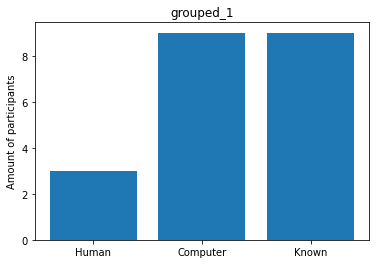

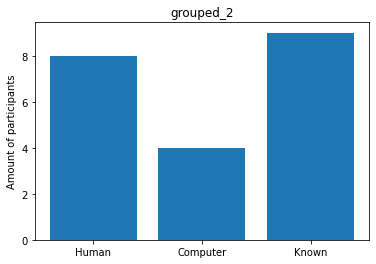

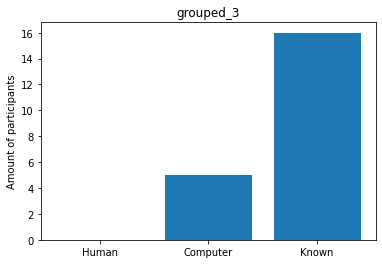

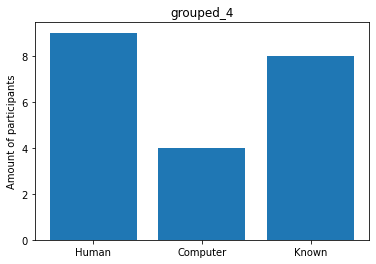

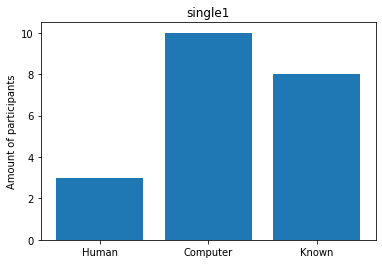

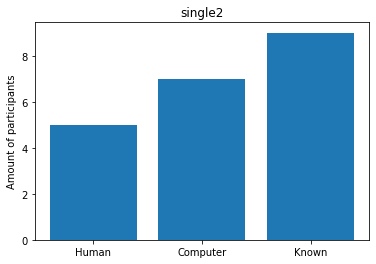

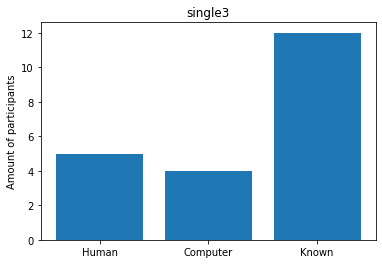

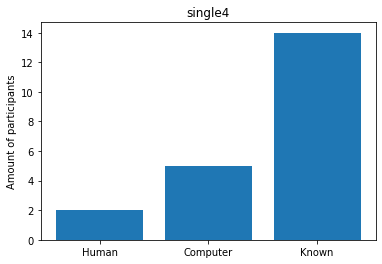

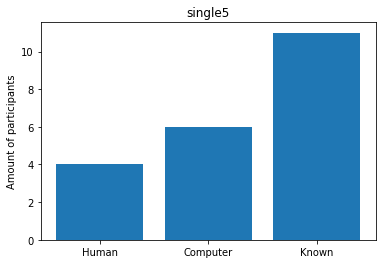

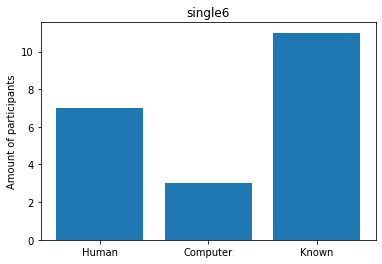

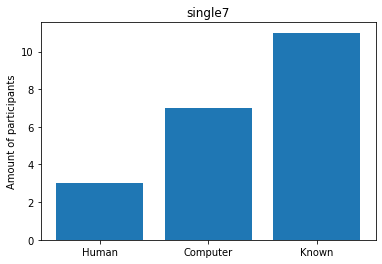

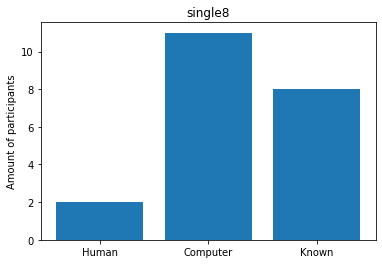

In [31]:
# Get all images
image_ids = images.image_id

for image_id in image_ids:
    # Get image name
    image_name = images[images.image_id == image_id].filename.item()
    
    # Determine grouped or single image
    is_grouped = images[images.image_id == image_id].grouped.item()
    
    # Calculate values
    if (is_grouped):
        values = [ratings_grouped[(ratings_grouped.image_id == image_id) & (ratings_grouped.made_by == "human")].shape[0],
                  ratings_grouped[(ratings_grouped.image_id == image_id) & (ratings_grouped.made_by == "computer")].shape[0],
                  ratings_grouped[(ratings_grouped.image_id == image_id) & (ratings_grouped.made_by == "known")].shape[0]]
    else:
        values = [ratings_single[(ratings_single.image_id == image_id) & (ratings_single.made_by == "human")].shape[0],
                  ratings_single[(ratings_single.image_id == image_id) & (ratings_single.made_by == "computer")].shape[0],
                  ratings_single[(ratings_single.image_id == image_id) & (ratings_single.made_by == "known")].shape[0]]
    
    x_ticks = ["Human", "Computer", "Known"]
    
    # Replace NaN with 0 - occurs when certain rating doesn't occur
    values = pd.Series(values).fillna(0).tolist()
    
    x = np.arange(len(values))
    y = values
    
    # Show plot
    plt.title(image_name)
    plt.ylabel('Amount of participants')
    plt.xticks(x, x_ticks)
    
    plt.bar(x, y, align='center', capsize=5)
    
    plt.savefig("Graphs/Made_by/" + image_name, dpi=300, bbox_inches='tight') 
    plt.show()

<hr>

## Bias analysis

The following code blocks will give some analytics for the biases.

### Bias distribution

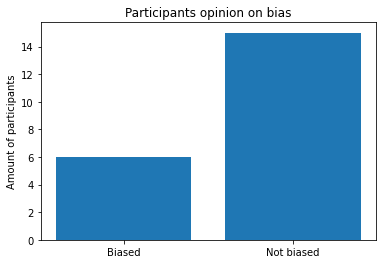

In [7]:
# Calculate values
values = [bias[(bias.biased == "biased")].shape[0], bias[(bias.biased == "nonbiased")].shape[0]]
x_ticks = ["Biased", "Not biased"]

x = np.arange(len(values))
y = values

# Show plot
plt.title("Participants opinion on bias")
plt.ylabel('Amount of participants')
plt.xticks(x, x_ticks)

plt.bar(x, y, align='center', capsize=5)

plt.savefig("Graphs/Bias/bias_distribution", dpi=300, bbox_inches='tight') 
plt.show()

<hr>

## Grouped ratings analysis

The following code blocks will give some analytics for the grouped ratings.

### Correspondence rating of rim design modification

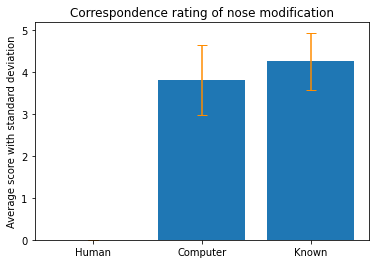

In [8]:
# Get image id
image_id = images[images.filename == "grouped_3"].image_id.item()

# Calculate values
means = [ratings_grouped[(ratings_grouped.image_id == image_id) & (ratings_grouped.made_by == "human")].correspondence.mean(),
         ratings_grouped[(ratings_grouped.image_id == image_id) & (ratings_grouped.made_by == "computer")].correspondence.mean(),
         ratings_grouped[(ratings_grouped.image_id == image_id) & (ratings_grouped.made_by == "known")].correspondence.mean()]

errors = [ratings_grouped[(ratings_grouped.image_id == image_id) & (ratings_grouped.made_by == "human")].correspondence.std(),
          ratings_grouped[(ratings_grouped.image_id == image_id) & (ratings_grouped.made_by == "computer")].correspondence.std(),
          ratings_grouped[(ratings_grouped.image_id == image_id) & (ratings_grouped.made_by == "known")].correspondence.std()]

x_ticks = ["Human", "Computer", "Known"]

# Replace NaN with 0 - occurs when certain rating doesn't occur
means = pd.Series(means).fillna(0).tolist()
errors = pd.Series(errors).fillna(0).tolist()

x = np.arange(len(means))
y = means

# plot a histogram with standard deviation
plt.title("Correspondence rating of nose modification")
plt.ylabel('Average score with standard deviation')
plt.xticks(x, x_ticks)

plt.bar(x, y, yerr=errors, align='center', ecolor='darkorange', capsize=5)

plt.savefig("Graphs/Grouped/rim_design_correspondence", dpi=300, bbox_inches='tight') 
plt.show()

<hr>

## Single ratings analysis

The following code blocks will give some analytics for the single ratings.

### Creativity of album art cover

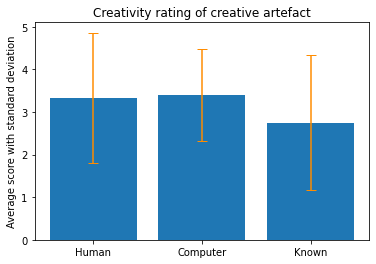

In [9]:
# Get image id
image_id = images[images.filename == "single1"].image_id.item()

# Calculate values
means = [ratings_single[(ratings_single.image_id == image_id) & (ratings_single.made_by == "human")].creative.mean(),
         ratings_single[(ratings_single.image_id == image_id) & (ratings_single.made_by == "computer")].creative.mean(),
         ratings_single[(ratings_single.image_id == image_id) & (ratings_single.made_by == "known")].creative.mean()]

errors = [ratings_single[(ratings_single.image_id == image_id) & (ratings_single.made_by == "human")].creative.std(),
          ratings_single[(ratings_single.image_id == image_id) & (ratings_single.made_by == "computer")].creative.std(),
          ratings_single[(ratings_single.image_id == image_id) & (ratings_single.made_by == "known")].creative.std()]

x_ticks = ["Human", "Computer", "Known"]

# Replace NaN with 0 - occurs when certain rating doesn't occur
means = pd.Series(means).fillna(0).tolist()
errors = pd.Series(errors).fillna(0).tolist()

x = np.arange(len(means))
y = means

# plot a histogram with standard deviation
plt.title("Creativity rating of creative artefact")
plt.ylabel('Average score with standard deviation')
plt.xticks(x, x_ticks)

plt.bar(x, y, yerr=errors, align='center', ecolor='darkorange', capsize=5)

plt.savefig("Graphs/Single/album_art_cover_creative", dpi=300, bbox_inches='tight') 
plt.show()